# Projeto Final de Ciência dos Dados - FIFA 18
<h2><li>Luigi Portugal</li> 
<li>Jadson Silva</li>
</h2>

<h1> Abrindo Banco de Dados</h1>

In [111]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
import sklearn.model_selection as split 
import seaborn as sns



ModuleNotFoundError: No module named 'plotly'

In [73]:
dados = pd.read_csv('CompleteDataset.csv')

atributos = ['Preferred Positions',
'Acceleration',
'Aggression',
'Agility',
'Balance',
'Ball control',
'Composure',
'Crossing',
'Curve',
'Dribbling',
'Finishing',
'Free kick accuracy',
'GK diving',
'GK handling',
'GK kicking',
'GK positioning',
'GK reflexes',
'Heading accuracy',
'ID',
'Interceptions',
'Jumping',
'Long passing',
'Long shots',
'Marking',
'Penalties',
'Positioning',
'Reactions',
'Short passing',
'Shot power',
'Sliding tackle',
'Sprint speed',
'Stamina',
'Standing tackle',
'Strength',
'Vision',
'Volleys']
dados = dados[atributos]
dados


,Preferred Positions,Acceleration,Aggression,Agility,Balance,Ball control,Composure,Crossing,Curve,Dribbling,...,Reactions,Short passing,Shot power,Sliding tackle,Sprint speed,Stamina,Standing tackle,Strength,Vision,Volleys
0,ST LW,89,63,89,63,93,95,85,81,91,...,96,83,94,23,91,92,31,80,85,88
1,RW,92,48,90,95,95,96,77,89,97,...,95,88,85,26,87,73,28,59,90,85
2,LW,94,56,96,82,95,92,75,81,96,...,88,81,80,33,90,78,24,53,80,83
3,ST,88,78,86,60,91,83,77,86,86,...,93,83,87,38,77,89,45,80,84,88
4,GK,58,29,52,35,48,70,15,14,30,...,85,55,25,11,61,44,10,83,70,11
5,ST,79,80,78,80,89,87,62,77,85,...,91,83,88,19,83,79,42,84,78,87
6,GK,57,38,60,43,42,64,17,21,18,...,88,50,31,13,58,40,21,64,68,13
7,LW,93,54,93,91,92,87,80,82,93,...,85,86,79,22,87,79,27,65,86,79
8,CDM CM,60,60,71,69,89,85,85,85,79,...,86,90,87,69,52,77,82,74,88,82
9,ST,78,50,75,69,85,86,68,74,84,...,88,75,88,18,80,72,22,85,70,88


In [78]:
dados_split = split.train_test_split(dados)
dados_treinamento = dados_split[0]

In [79]:
dados_teste = dados_split[1]

<h1> Análise Exploratória</h1>

In [86]:
dados.columns

Index(['Preferred Positions', 'Acceleration', 'Aggression', 'Agility',
       'Balance', 'Ball control', 'Composure', 'Crossing', 'Curve',
       'Dribbling', 'Finishing', 'Free kick accuracy', 'GK diving',
       'GK handling', 'GK kicking', 'GK positioning', 'GK reflexes',
       'Heading accuracy', 'ID', 'Interceptions', 'Jumping', 'Long passing',
       'Long shots', 'Marking', 'Penalties', 'Positioning', 'Reactions',
       'Short passing', 'Shot power', 'Sliding tackle', 'Sprint speed',
       'Stamina', 'Standing tackle', 'Strength', 'Vision', 'Volleys'],
      dtype='object')

In [84]:
dados.describe()

,Acceleration,Aggression,Agility,Balance,Ball control,Composure,Crossing,Curve,Dribbling,Finishing,...,Reactions,Short passing,Shot power,Sliding tackle,Sprint speed,Stamina,Standing tackle,Strength,Vision,Volleys
count,17981.000000,17981.000000,17981.000000,17981.000000,17981.000000,17981.000000,17981.000000,17981.000000,17981.000000,17981.000000,...,17981.000000,17981.000000,17981.000000,17981.000000,17981.000000,17981.000000,17981.000000,17981.000000,17981.000000,17981.000000
mean,64.607308,55.834992,63.345587,63.818364,58.119682,57.903120,49.791502,47.328124,55.076581,45.306435,...,61.910239,58.317224,55.670986,45.582559,64.842445,63.272176,47.456871,65.297369,53.032423,43.232190
std,14.916971,17.480816,14.794278,14.098144,16.800909,12.934109,18.470220,18.476582,18.993822,19.481567,...,9.179489,14.928462,17.407831,21.491756,14.654377,15.942077,21.841923,12.622276,14.396201,17.739679
min,11.000000,11.000000,14.000000,11.000000,8.000000,5.000000,5.000000,6.000000,2.000000,2.000000,...,28.000000,10.000000,3.000000,4.000000,11.000000,12.000000,4.000000,12.000000,10.000000,4.000000
25%,56.000000,43.000000,55.000000,56.000000,53.000000,51.000000,38.000000,34.000000,48.000000,29.000000,...,55.000000,53.000000,46.000000,24.000000,57.000000,56.000000,26.000000,58.000000,43.000000,30.000000
50%,67.000000,59.000000,65.000000,66.000000,63.000000,60.000000,54.000000,48.000000,61.000000,48.000000,...,62.000000,62.000000,59.000000,52.000000,67.000000,66.000000,54.000000,66.000000,55.000000,44.000000
75%,75.000000,69.000000,74.000000,74.000000,69.000000,67.000000,64.000000,62.000000,68.000000,61.000000,...,68.000000,68.000000,69.000000,64.000000,75.000000,74.000000,66.000000,74.000000,64.000000,57.000000
max,96.000000,106.000000,96.000000,96.000000,95.000000,100.000000,101.000000,92.000000,97.000000,95.000000,...,96.000000,92.000000,98.000000,95.000000,110.000000,116.000000,99.000000,98.000000,94.000000,91.000000


((array([-3.95325174, -3.73577467, -3.61671592, ...,  3.61671592,
          3.73577467,  3.95325174]),
  array([14, 15, 16, ..., 95, 96, 96], dtype=int64)),
 (14.575590727730726, 63.345587008508986, 0.985038240807147))

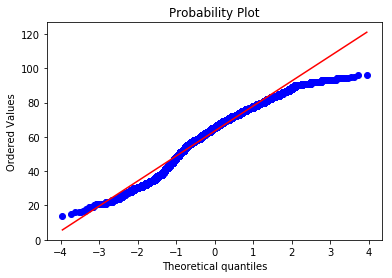

In [104]:
stats.probplot(dados['Agility'],dist='norm',plot=plt)

In [89]:
corr = dados.corr()
corr

,Acceleration,Aggression,Agility,Balance,Ball control,Composure,Crossing,Curve,Dribbling,Finishing,...,Reactions,Short passing,Shot power,Sliding tackle,Sprint speed,Stamina,Standing tackle,Strength,Vision,Volleys
Acceleration,1.000000,0.252033,0.798550,0.701015,0.670093,0.437792,0.657726,0.599608,0.742430,0.596914,...,0.191657,0.561220,0.536118,0.155373,0.915196,0.606822,0.154797,-0.161799,0.456072,0.567727
Aggression,0.252033,1.000000,0.234893,0.183006,0.539372,0.581617,0.466963,0.392808,0.424077,0.232687,...,0.394777,0.596222,0.494666,0.708982,0.284250,0.643334,0.732425,0.462864,0.296157,0.318644
Agility,0.798550,0.234893,1.000000,0.765561,0.700742,0.493918,0.689573,0.674679,0.758859,0.633944,...,0.278639,0.610389,0.565779,0.105848,0.752902,0.561058,0.111580,-0.243477,0.591123,0.622087
Balance,0.701015,0.183006,0.765561,1.000000,0.597047,0.373899,0.614481,0.578598,0.661079,0.512766,...,0.138723,0.535344,0.452222,0.151053,0.635493,0.469730,0.145048,-0.403441,0.487259,0.510694
Ball control,0.670093,0.539372,0.700742,0.597047,1.000000,0.763392,0.839398,0.832184,0.932577,0.784636,...,0.429038,0.905170,0.828401,0.366032,0.663104,0.721720,0.395357,0.075582,0.721259,0.792740
Composure,0.437792,0.581617,0.493918,0.373899,0.763392,1.000000,0.646874,0.668485,0.680153,0.588030,...,0.593547,0.756834,0.698453,0.384607,0.444765,0.605484,0.418337,0.266547,0.634599,0.644465
Crossing,0.657726,0.466963,0.689573,0.614481,0.839398,0.646874,1.000000,0.830703,0.852423,0.649413,...,0.381384,0.810203,0.704426,0.403434,0.641523,0.663915,0.415542,-0.039763,0.683400,0.687588
Curve,0.599608,0.392808,0.674679,0.578598,0.832184,0.668485,0.830703,1.000000,0.841343,0.753759,...,0.407848,0.777959,0.784841,0.225533,0.577726,0.590452,0.250967,-0.038865,0.743314,0.800248
Dribbling,0.742430,0.424077,0.758859,0.661079,0.932577,0.680153,0.852423,0.841343,1.000000,0.820804,...,0.351379,0.836356,0.796936,0.252786,0.724502,0.676008,0.275300,-0.051444,0.729025,0.808962
Finishing,0.596914,0.232687,0.633944,0.512766,0.784636,0.588030,0.649413,0.753759,0.820804,1.000000,...,0.319689,0.658597,0.799367,-0.085554,0.586387,0.500672,-0.049531,-0.019250,0.689137,0.879575


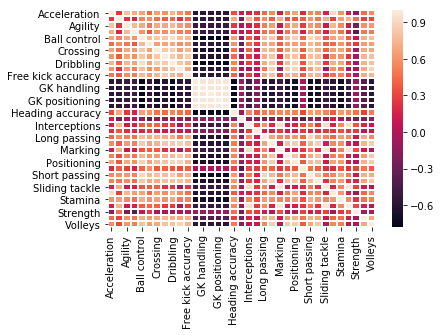

In [97]:
sns.heatmap(corr,linewidths=1)

TypeError: must be str, not int

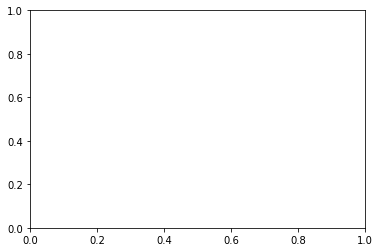

In [109]:
plt.boxplot(dados);